In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data\Battery_Testing_Data.csv")
Dff = pd.read_csv("Data\SOC_OCV_MFCTT_2019.csv",sep = "\t")


Plot the Voltages as a function of the SOC

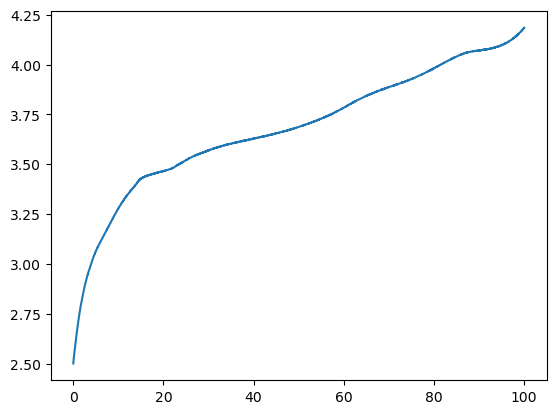

In [4]:
plt.figure()
plt.plot(Dff['SOC'],Dff['Ecell/V'])
plt.show()

Plot the Experimental Voltage as a function of time 

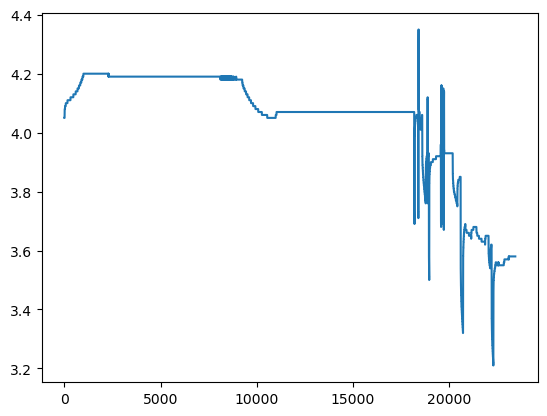

In [5]:
T = df['Time (s)']
Cur = df['Current (mA)']
Volt = df['Voltage (V)']
Temp = df['Temperature']
plt.figure()
plt.plot(T,Volt)
plt.show()

Zoom on the disharge

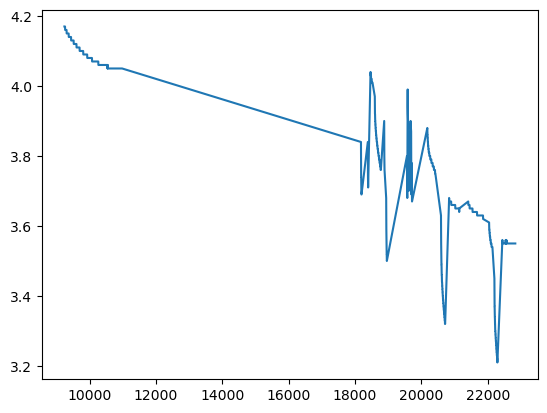

9238.0 4.17


In [6]:
Tclean = []
Voltc = []
Curc = []
for k in range(len(T)) :
    if Cur[k] < 0 :
        Tclean.append(T[k])
        Voltc.append(Volt[k])
        Curc.append(Cur[k])
plt.figure()
plt.plot(Tclean,Voltc)
plt.show()
print(Tclean[0],Voltc[0])

predicted SOC using coulomb technique 

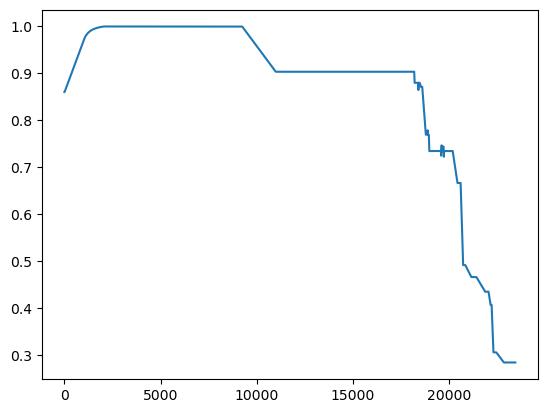

In [7]:
Z = [0.86]
Cur[0]=0
for k in range(len(T)-1) :
    Z.append(Z[k]+Cur[k]*(1/2500)/3600)

plt.figure()
plt.plot(T,Z)
plt.show()

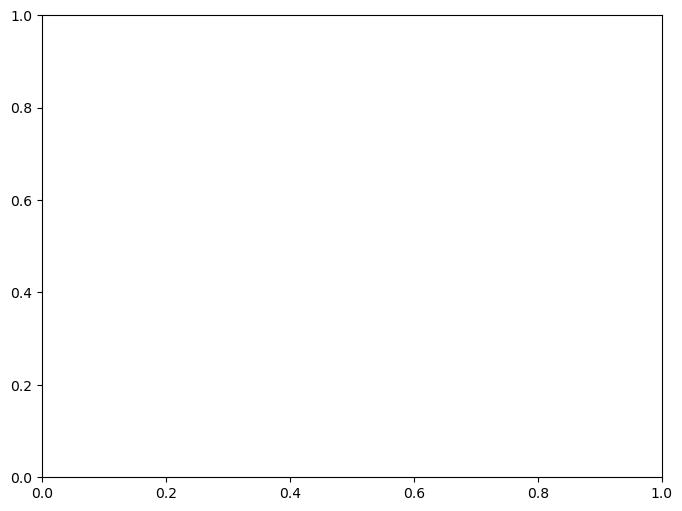

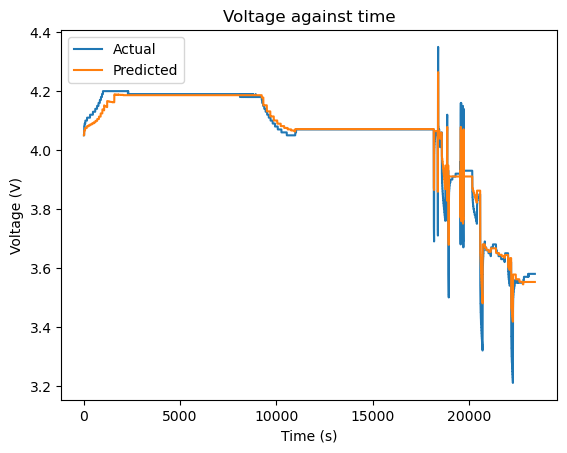

In [12]:
R = 0.08/5
Cur = np.array(Cur)
OCV = []
Zmodif = np.round(Dff['SOC'],2)
U = list(Zmodif/100)
for k in range(len(Cur)) :
    z = Z[k]
    z = np.round(z,2)
    
    OCV.append(Dff['Ecell/V'][U.index(z)])
    
        
Voltpredict = R*Cur/1000+OCV

fig, ax = plt.subplots(figsize=(8,6))
plt.figure()
plt.plot(T,Volt, label="Actual")
plt.plot(T,Voltpredict, label="Predicted")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage against time")
plt.show()

ploting the absolute error 

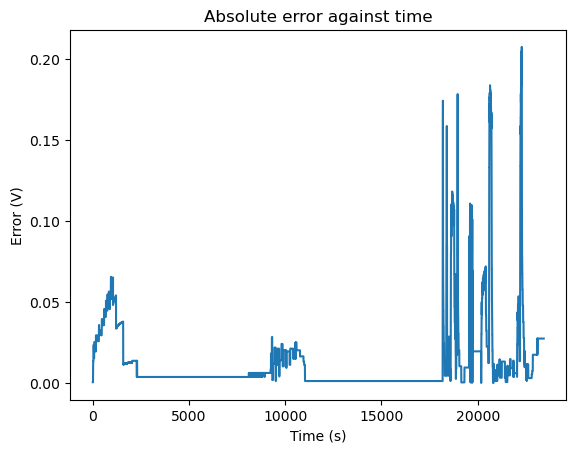

In [9]:
Error = []
for k in range(len(T)):
    Error.append(np.abs(Volt[k] - Voltpredict[k]))
plt.figure()
plt.plot(T,Error)
plt.xlabel("Time (s)")
plt.ylabel("Error (V)")
plt.title("Absolute error against time")
plt.show()

plotting the relative error (%)

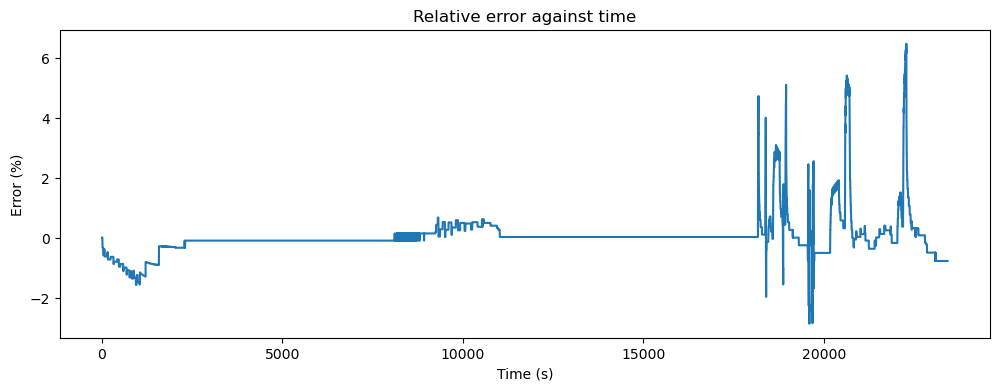

In [16]:
Error = []
for k in range(len(T)):
    Error.append((Voltpredict[k] - Volt[k])/Volt[k]*100)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(T,Error)
plt.xlabel("Time (s)")
plt.ylabel("Error (%)")
plt.title("Relative error against time")
plt.show()